In [1]:
import mreels
import matplotlib.pyplot as plt
import numpy as np

In [2]:
eels_stack_low = mreels.MomentumResolvedDataStack('n-inse_C1_EFTEM-SI-003 [-3,36] eV.dm4')
eels_stack_high = mreels.MomentumResolvedDataStack('n-inse_C1_EFTEM-SI-004 [-3,36] eV.dm4')
#eels_scope = mreels.ImagingSetup('n-inse_C1_EFTEM-SI-001 [-3,36] eV.dm4')

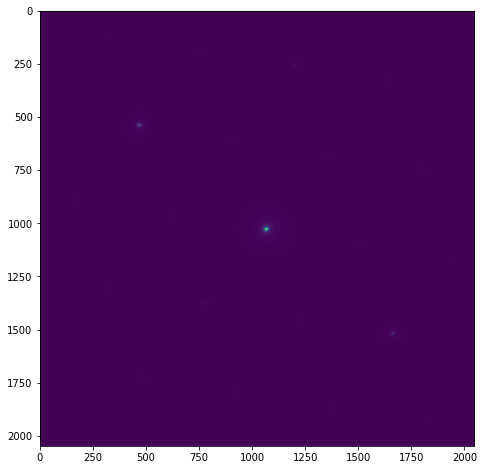

In [3]:
plt.imshow(eels_stack_low.stack[25].T)
plt.gcf().set_size_inches((8,8))

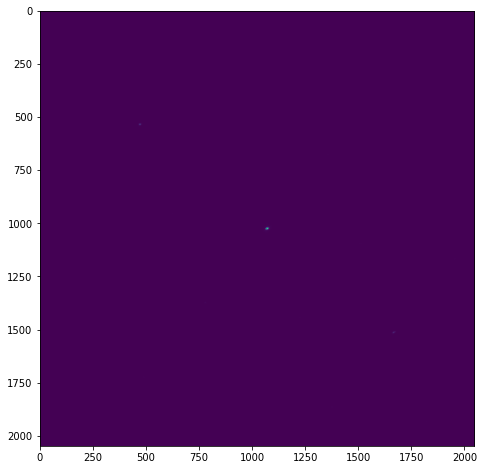

In [4]:
plt.imshow(eels_stack_high.stack[25].T)
plt.gcf().set_size_inches((8,8))

In [3]:
true_centre = mreels.get_true_centres(eels_stack_low.stack[25], ((500,500),(980,1370)))